# Sesión 1 – Apartado 2: Limpieza y preprocesamiento avanzado

**Duración recomendada:** ~80 min

**Objetivos:**
- Identificar y tratar valores nulos.
- Aplicar diferentes técnicas de imputación.
- Codificar variables categóricas.
- Escalar y normalizar variables numéricas.


## 1) Cargar el dataset sintético

In [2]:
import pandas as pd
df = pd.read_csv('../data/raw/mini_titanic.csv')
df.head()

,sex,class,age,fare,survived
0,male,Third,34.352706,119.00,0
1,female,Second,50.654987,66.77,0
2,male,First,42.007235,21.87,0
3,male,Second,27.760861,NaN,0
4,male,Third,29.733773,212.45,0


## 2) Identificación de valores nulos

In [3]:
df.isna().sum().sort_values(ascending=False)

age         35
fare        20
class       15
sex          0
survived     0
dtype: int64

## 3) Imputación de valores nulos

Probamos varias estrategias de imputación:
- Media (para variables numéricas)
- Mediana
- KNNImputer (más avanzado)


In [9]:
from sklearn.impute import SimpleImputer, KNNImputer

In [6]:
# Imputación con media
imputer_mean = SimpleImputer(strategy="mean")
df["age_imputed"] = imputer_mean.fit_transform(df[["age"]])

df[df['age'].isna()].head()

,sex,class,age,fare,survived,age_imputed,fare_imputed
12,male,Third,NaN,26.41,0,29.755908,26.41
15,male,Third,NaN,29.52,0,29.755908,29.52
18,female,First,NaN,3.25,1,29.755908,3.25
29,female,First,NaN,74.98,1,29.755908,74.98
47,male,Third,NaN,9.97,0,29.755908,9.97


In [7]:
# Imputación con mediana
imputer_median = SimpleImputer(strategy="median")
df["fare_imputed"] = imputer_median.fit_transform(df[["fare"]])

df[df["fare"].isna()].head()

,sex,class,age,fare,survived,age_imputed,fare_imputed
3,male,Second,27.760861,NaN,0,27.760861,29.12
13,male,Third,35.623964,NaN,0,35.623964,29.12
19,male,Third,19.177863,NaN,0,19.177863,29.12
44,female,Second,46.512162,NaN,1,46.512162,29.12
57,male,Third,28.006687,NaN,0,28.006687,29.12


In [8]:
# KNNImputer en conjunto numérico
num_cols = ["age", "fare"]
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df[num_cols]), columns=num_cols)
df_knn.head()

,age,fare
0,34.352706,119.000
1,50.654987,66.770
2,42.007235,21.870
3,27.760861,28.116
4,29.733773,212.450


## 4) Codificación de variables categóricas

In [11]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# OneHotEncoder en columna 'sex'
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
sex_encoded = encoder.fit_transform(df[['sex']])
sex_encoded[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [12]:
# OrdinalEncoder en columna 'class'
ord_enc = OrdinalEncoder()
df['class_encoded'] = ord_enc.fit_transform(df[['class']])
df[['class', 'class_encoded']].head()

,class,class_encoded
0,Third,2.0
1,Second,1.0
2,First,0.0
3,Second,1.0
4,Third,2.0


## 5) Escalado y normalización

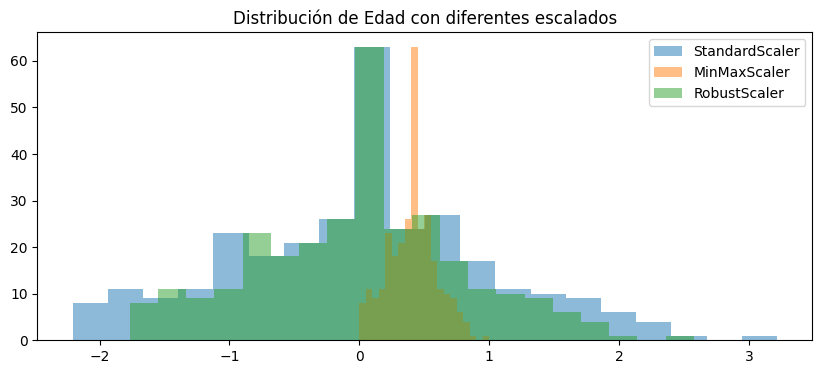

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

age_std = scaler_std.fit_transform(df[['age_imputed']])
age_minmax = scaler_minmax.fit_transform(df[['age_imputed']])
age_robust = scaler_robust.fit_transform(df[['age_imputed']])

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.hist(age_std, bins=20, alpha=0.5, label='StandardScaler')
plt.hist(age_minmax, bins=20, alpha=0.5, label='MinMaxScaler')
plt.hist(age_robust, bins=20, alpha=0.5, label='RobustScaler')
plt.legend()
plt.title('Distribución de Edad con diferentes escalados')
plt.show()